In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
df  = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [5]:
df.head()

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,South,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - So...","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'N...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",1789.0,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,not available,12.0,East,Undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro St...",NaN,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",NaN,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3.0,Na,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Prat...","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1...","['Lift(s)', 'Water purifier', 'Maintenance Sta...",NaN,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,Na,New Property,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,"store room,pooja room",4.0,East,Relatively New,"['Radhakrishna Shani Mandir', 'Sanatan Dharm M...","['8 Wardrobe', '4 Fan', '1 Exhaust Fan', '12 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


In [6]:
df.shape

(3803, 29)

In [7]:
df.columns

Index(['Unnamed: 0', 'property_type', 'society', 'sector', 'price', 'Area',
       'price_per_sqft', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'furnishDetails', 'features', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study room', 'servant room',
       'store room', 'pooja room', 'others', 'furnishing_type',
       'features_list', 'luxury_score'],
      dtype='object')

C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


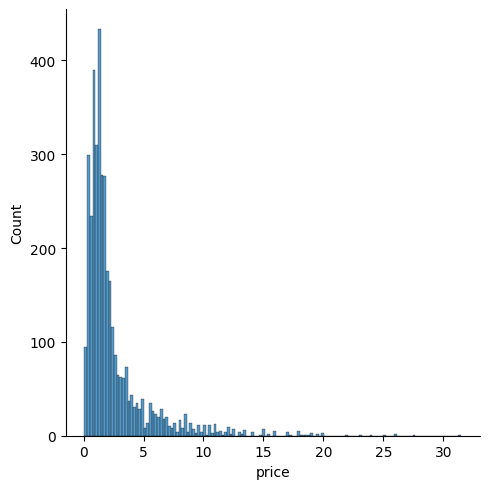

In [8]:
# outlier on the basis of price column
sns.displot(df['price'])

<Axes: xlabel='price'>

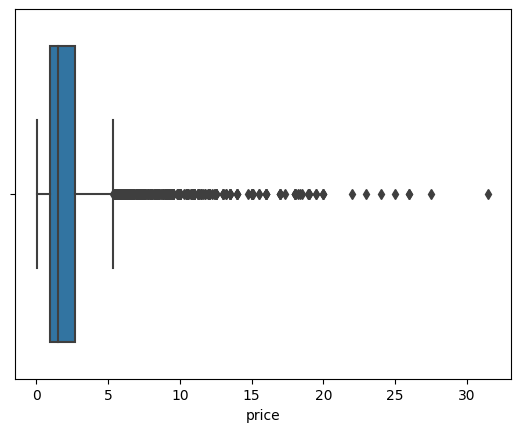

In [9]:
sns.boxplot(x = df['price'])

In [10]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [11]:
outliers.sort_values('price', ascending=False).head(20)

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
1665,1665,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,9000.0,35000.0,Plot area 1000(836.13 sq.m.),7,9,3+,"pooja room,store room,study room,servant room",3.0,North-East,Moderately old,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Water Purifier', '15 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1000.0,NaN,1,1,1,1,0,1,"['Feng Shui / Vaastu Compliant', 'Private Gard...",74
126,126,house,independent,sector 43,27.50,11286.0,24366.0,Plot area 1254(1048.5 sq.m.),6,7,3+,"pooja room,study room,servant room,others",3.0,North-East,Relatively New,"['Huda city centre metro station', 'New Life C...","['1 Water Purifier', '6 Fan', '1 Exhaust Fan',...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1254.0,NaN,1,1,0,1,1,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",42
1824,1824,house,dlf city plots,sector 26,26.00,4545.0,57206.0,Plot area 505(422.24 sq.m.),6,7,3+,"pooja room,study room,servant room,others",2.0,North-East,New Property,"['Phase 2 Metro Station', 'Grand Mall', 'Jacar...","['12 Fan', '1 Exhaust Fan', '6 Geyser', '1 Sto...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,505.0,NaN,1,1,0,1,1,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",138
1158,1158,house,independent,sector 26,26.00,3150.0,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,"servant room,study room,pooja room,store room",4.0,North-West,New Property,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Water Purifier', '26 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,400.0,350.0,1,1,1,1,0,1,"['Feng Shui / Vaastu Compliant', 'Private Gard...",72
778,778,house,suncity township,sector 54,25.00,8036.0,31111.0,Plot area 1000(836.13 sq.m.),4,4,3+,"study room,pooja room,servant room,store room",2.0,North,Moderately old,"['Sector 54 chowk metro station', 'Sector metr...",NaN,NaN,NaN,1000.0,NaN,1,1,1,1,0,0,[],0
1287,1287,house,emaar the palm springs,sector 54,24.00,400.0,600000.0,Plot area 400(37.16 sq.m.),5,5,2,"pooja room,study room,servant room",1.0,North-East,Old Property,"['Sector 53-54 Metro Station', 'Central Plaza ...","['8 Fan', '1 Exhaust Fan', '7 Geyser', '32 Lig...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,400.0,NaN,1,1,0,1,0,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",122
2099,2099,house,independent,sector 26,23.00,9000.0,25556.0,Plot area 1000(836.13 sq.m.),4,4,3+,"study room,pooja room,store room,servant room",2.0,South-West,Relatively New,"['Guru dronacharya metro station', 'Dlf phase ...","['7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stov...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,1000.0,NaN,1,1,1,1,0,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",145
2818,2818,house,vipul tatvam villa,sector 48,22.00,8250.0,26667.0,Plot area 1000(836.13 sq.m.),5,6,3,servant room,3.0,NaN,Moderately old,"['Athena', 'Star Mall', 'The Sixth Element Sch...","['5 Wardrobe', '6 Fan', '10 Light', '6 AC', 'N...","['Private Garden / Terrace', 'Maintenance Staf...",NaN,1000.0,NaN,0,1,0,0,0,0,"['Private Garden / Terrace', 'Maintenance Staf...",54
97,97,house,luxury dlf city floors,sector 26,20.00,4091.0,48889.0,Plot area 500(418.06 sq.m.),16,16,3+,servant room,4.0,NaN,New Property,"['Sikandarpur metro station', 'Sikanderpur met...","['16 Wardrobe', '26 Fan', '1 Exhaust Fan', '16...","['High Ceiling Height', 'Park', 'Visitor Parki...",NaN,500.0,NaN,0,1,0,0,0,2,"['High Ceiling Height', 'Park', 'Visitor Parki...",31
699,699,house,independent,sector 26,20.00,4500.0,44444.0,Plot area 500(418.06 sq.m.),5,7,3+,"servant room,pooja room",3.0,West,Relatively New,"

In [12]:
outliers.to_csv('outliers.csv')

### Price_per_sqft

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

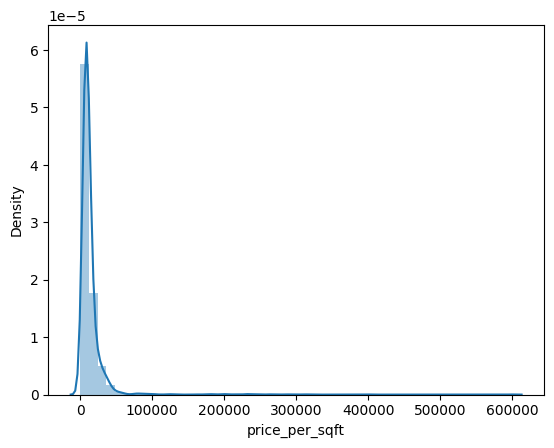

In [13]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

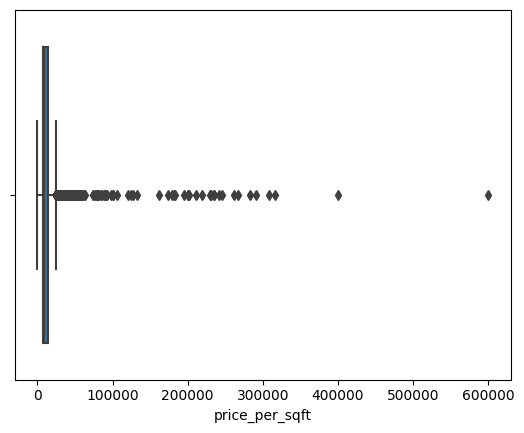

In [14]:
sns.boxplot(x=df['price_per_sqft'])

In [15]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(367,
 count       367.000000
 mean      52115.435967
 std       60746.225927
 min       24202.000000
 25%       27778.000000
 50%       33333.000000
 75%       41790.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [17]:
outliers_sqft['Area'] = outliers_sqft['Area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\34698882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['Area'] = outliers_sqft['Area'].apply(lambda x:x*9 if x<1000 else x)


In [19]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['Area'])

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\3927954440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['Area'])


In [20]:
outliers_sqft['price_per_sqft'].describe()

count      367.000000
mean     29160.735695
std      12308.413881
min       2689.000000
25%      25051.500000
50%      29630.000000
75%      35489.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [21]:
df.update(outliers_sqft)

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

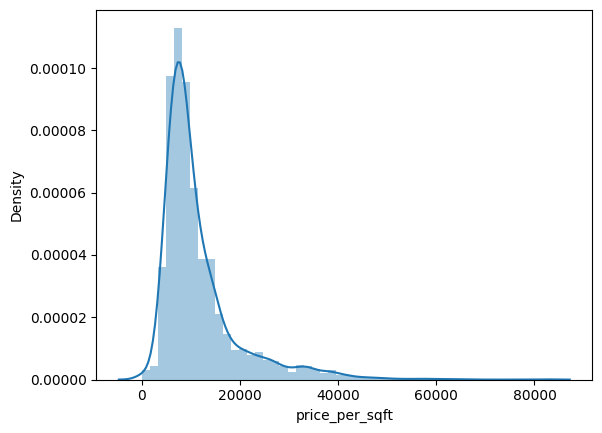

In [22]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

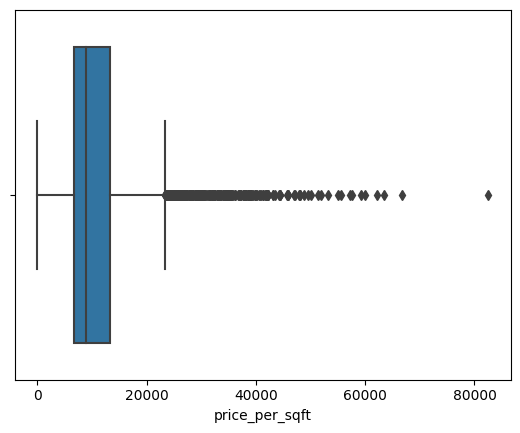

In [23]:
sns.boxplot(x=df['price_per_sqft'])

In [24]:
df[df['price_per_sqft']>50000]

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
165,165,house,emaar the palm springs,sector 54,14.00,2250.0,62222.0,Plot area 250(209.03 sq.m.),4,5,3+,"study room,servant room",2.0,North,Old Property,"['Sector 53-54 Metro Station', 'Central Plaza ...","['5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Wash...","['Centrally Air Conditioned', 'Water purifier'...",NaN,250.0,NaN,1,1,0,0,0,2,"['Centrally Air Conditioned', 'Water purifier'...",160
1158,1158,house,independent,sector 26,26.00,3150.0,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,"servant room,study room,pooja room,store room",4.0,North-West,New Property,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Water Purifier', '26 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,400.0,350.0,1,1,1,1,0,1,"['Feng Shui / Vaastu Compliant', 'Private Gard...",72
1260,1260,flat,unitech vistas,sector 70,9.00,1565.0,57508.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,not available,7.0,Na,Undefined,"['Airia Mall', 'Delhi Ajmer Highway', 'Sohna R...",NaN,NaN,NaN,1565.0,NaN,0,0,0,0,0,0,[],0
1287,1287,house,emaar the palm springs,sector 54,24.00,3600.0,66667.0,Plot area 400(37.16 sq.m.),5,5,2,"pooja room,study room,servant room",1.0,North-East,Old Property,"['Sector 53-54 Metro Station', 'Central Plaza ...","['8 Fan', '1 Exhaust Fan', '7 Geyser', '32 Lig...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,400.0,NaN,1,1,0,1,0,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",122
1824,1824,house,dlf city plots,sector 26,26.00,4545.0,57206.0,Plot area 505(422.24 sq.m.),6,7,3+,"pooja room,study room,servant room,others",2.0,North-East,New Property,"['Phase 2 Metro Station', 'Grand Mall', 'Jacar...","['12 Fan', '1 Exhaust Fan', '6 Geyser', '1 Sto...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,505.0,NaN,1,1,0,1,1,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",138
1876,1876,house,emaar mgf marbella,sector 66,18.00,3240.0,55556.0,Plot area 360(301.01 sq.m.),4,4,3+,"pooja room,study room,servant room",3.0,East,Moderately old,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","['1 Water Purifier', '16 Fan', '1 Fridge', '1 ...","['High Ceiling Height', 'Maintenance Staff', '...",NaN,360.0,NaN,1,1,0,1,0,1,"['High Ceiling Height', 'Maintenance Staff', '...",75
1880,1880,house,independent,sector 26,14.75,2844.0,51864.0,Plot area 316(264.22 sq.m.),16,20,3+,"pooja room,study room,servant room,store room",4.0,East,New Property,"['Guru dronacharya metro station', 'Dlf phase ...","['1 Exhaust Fan', '1 Microwave', '7 AC', '1 Mo...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,316.0,NaN,1,1,1,1,0,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",153
1946,1946,house,malibu towne,sector 47,8.50,1600.0,53125.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,not available,4.0,North,New Property,"['Standard chartered ATM', 'Icici bank ATM', '...","['12 Wardrobe', '12 Fan', '1 Exhaust Fan', '10...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1600.0,NaN,0,0,0,0,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",99
1986,1986,house,project housing board colony,sector 31,8.00,1260.0,63492.0,Built Up area: 140 (117.06 sq.m.),2,1,0,not available,1.0,NaN,Undefined,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Stat...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,NaN,140.0,NaN,0,0,0,0,0,0,[],0
2874,2874,house,cloudnine cottages,sohna road road,5.50,1000.0,55000.0,Plot area 1000(92.9 sq.m.),3,3,0,not available,1.0,NaN,Moderately old,"['Rajiv Chowk Mosque', 'Standard chartered ATM...",[],NaN,NaN,1000.0,NaN,0,0,0,0,0,0,[],0


In [25]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

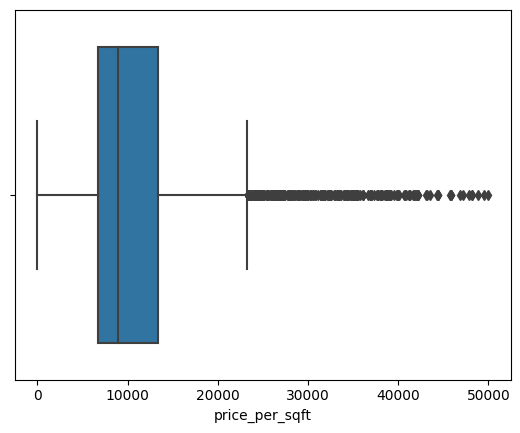

In [26]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\3425614435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Area'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Area', ylabel='Density'>

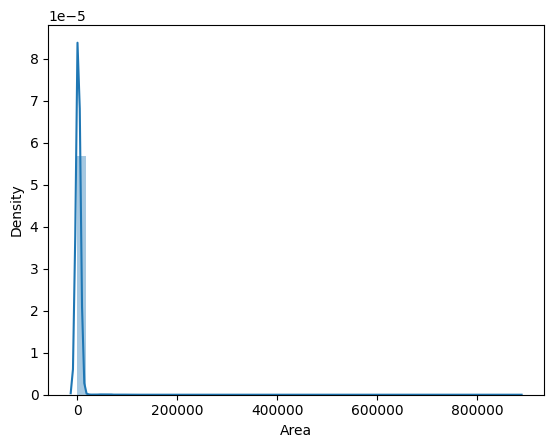

In [27]:
sns.distplot(df['Area'])

<Axes: xlabel='Area'>

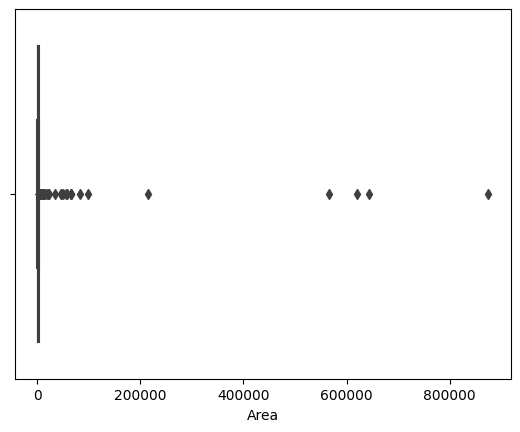

In [29]:
sns.boxplot(x=df['Area'])

In [31]:
df['Area'].describe()

count      3772.00000
mean       2906.69035
std       22822.30511
min         145.00000
25%        1257.75000
50%        1745.00000
75%        2340.00000
max      875000.00000
Name: Area, dtype: float64

In [33]:
df[df['Area'] > 100000]

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
182,182,flat,signature the roselia,sector 95,0.45,642857.0,7.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,not available,2.0,South-West,New Property,"['Newtown Square Mall', 'Pataudi Road', 'Dwark...",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN,569243.0,0,0,0,0,0,0,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",76
3305,3305,flat,hcbs sports ville,sohna road,0.35,875000.0,4.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,not available,8.0,Na,Relatively New,"['The roadside cafe', 'GD Goenka Mess', 'ROyal...","['1 Water Purifier', '1 Fridge', '1 Fan', '1 G...","['Security / Fire Alarm', 'Intercom Facility',...",NaN,737147.0,NaN,0,0,0,0,0,1,"['Security / Fire Alarm', 'Intercom Facility',...",44
3358,3358,flat,signature global solera 2,sector 107,0.51,566667.0,9.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,not available,3.0,North,New Property,"['Dwarka Expressway', 'Delhi', 'IGI Airport']",NaN,"['Security / Fire Alarm', 'Intercom Facility',...",NaN,NaN,514396.0,0,0,0,0,0,0,"['Security / Fire Alarm', 'Intercom Facility',...",44
3381,3381,flat,ramsons kshitij,sector 95,0.31,620000.0,5.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,"study room,others",1.0,North-East,Relatively New,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,607936.0,1,0,0,0,1,0,"['Feng Shui / Vaastu Compliant', 'Security / F...",65
3732,3732,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,"pooja room,study room,servant room,others",2.0,NaN,New Property,"['Standard chartered ATM', 'Icici bank ATM', '...","['1 Fan', '1 Exhaust Fan', '1 Dining Table', '...",NaN,NaN,2.0,NaN,1,1,0,1,1,2,[],0


In [35]:
df = df[df['Area'] < 100000]

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\3425614435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Area'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Area', ylabel='Density'>

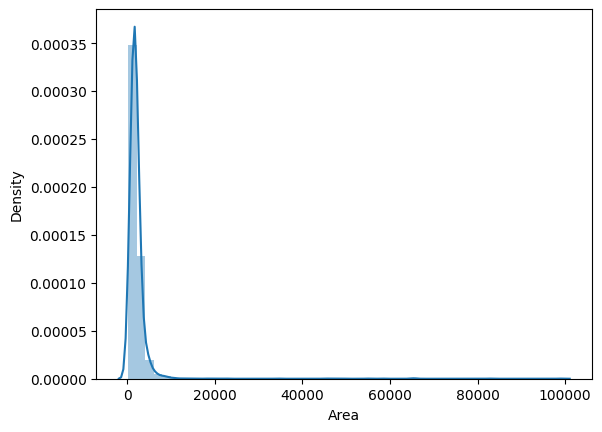

In [37]:
sns.distplot(df['Area'])

<Axes: xlabel='Area'>

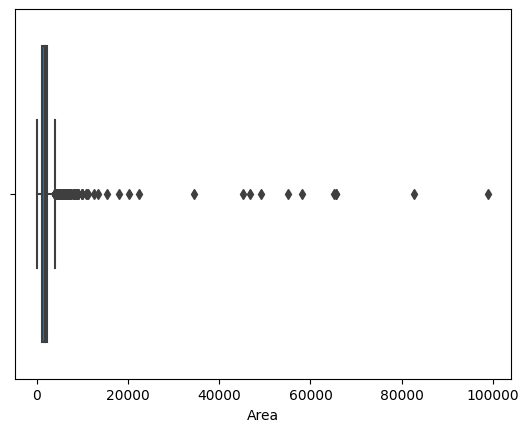

In [39]:
sns.boxplot(x=df['Area'])

In [42]:
df[df['Area'] > 10000].sort_values('Area',ascending=False)

# 2715,2200,2179,1271,1741,2734,1100,1585,1745,1313,520,138,2294,1330,2788,3577,126,921,1680

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
2715,2715,house,independent,sector 26,18.40,98978.0,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,"pooja room,store room,servant room",4.0,South,Relatively New,"['Guru dronacharya metro station', 'Dlf phase ...","['6 Wardrobe', '16 Fan', '1 Exhaust Fan', '8 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,NaN,11000.00,0,1,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",60
2200,2200,house,ganpati heights apartment,sector 13,1.25,82781.0,151.0,Plot area 115(7692.86 sq.m.),10,6,2,others,3.0,South-East,Old Property,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'Lot...","['1 Fan', '1 Light', '2 Wardrobe', 'No AC', 'N...","['Water Storage', 'Waste Disposal']",NaN,115.0,NaN,0,0,0,0,1,0,"['Water Storage', 'Waste Disposal']",7
2179,2179,flat,rof ananda,sector 95,0.38,65517.0,58.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,study room,10.0,East,New Property,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...",NaN,"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,64529.00,1,0,0,0,0,0,"['Intercom Facility', 'Lift(s)', 'Park']",15
1271,1271,flat,rof ananda,sector 95,0.38,65517.0,58.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,not available,12.0,North,Relatively New,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",NaN,NaN,64412.00,0,0,0,0,0,0,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",51
1741,1741,house,dlf city plot phase 4,sector 28,13.00,65261.0,1992.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,not available,1.0,NaN,Undefined,"['Dlf phase 1 metro station', 'Huda city centr...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,NaN,7250.00,0,0,0,0,0,0,[],0
2734,2734,flat,pyramid elite,sector 86,0.46,58228.0,79.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,Na,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.00,0,0,0,0,0,0,"['Intercom Facility', 'Lift(s)', 'Park']",15
1100,1100,flat,rof ananda,sector 95,0.33,55000.0,60.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,not available,13.0,South-West,Relatively New,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...",NaN,"['Security / Fire Alarm', 'Intercom Facility',...",NaN,NaN,54917.00,0,0,0,0,0,0,"['Security / Fire Alarm', 'Intercom Facility',...",37
1585,1585,flat,signature the serenas,sohna road,0.28,49123.0,57.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,study room,1.0,North-West,Relatively New,"['Signature Global Infinity Mall', 'Sohna Road...",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN,48811.00,1,0,0,0,0,0,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",37
1745,1745,house,independent,sector 25,7.30,46795.0,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,"servant room,store room",3.0,North-West,Relatively New,"['Vodafone belvedere towers metro station', 'D...","['12 Fan', '1 Exhaust Fan', '28 Light', '1 Mod...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN,5800.0,5200.00,0,1,1,0,0,2,"['Feng Shui / Vaastu Compliant', 'High Ceiling...",109
1543,1543,flat,ramsons kshitij,sector 95,0.24,45283.0,53.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,others,10.0,North-West,Relatively New,"['Bangali Clinic', 'Yadav Clinic', 'Dr. J. S. ...",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",NaN,NaN,45966.00,0,0,0,0,1,0,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",33


In [43]:
df.drop(index=[2715,2200,2179,1271,1741,2734,1100,1585,1745,1313,520,138,2294,1330,2788,3577,126,921,1680], inplace= True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\2153762726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[2715,2200,2179,1271,1741,2734,1100,1585,1745,1313,520,138,2294,1330,2788,3577,126,921,1680], inplace= True)


In [45]:
df[df['Area'] > 10000].sort_values('Area',ascending=False)

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
1543,1543,flat,ramsons kshitij,sector 95,0.24,45283.0,53.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,others,10.0,North-West,Relatively New,"['Bangali Clinic', 'Yadav Clinic', 'Dr. J. S. ...",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",NaN,NaN,45966.0,0,0,0,0,1,0,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",33


In [46]:
df.loc[1543,'Area'] = 53*9

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\3425614435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Area'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Area', ylabel='Density'>

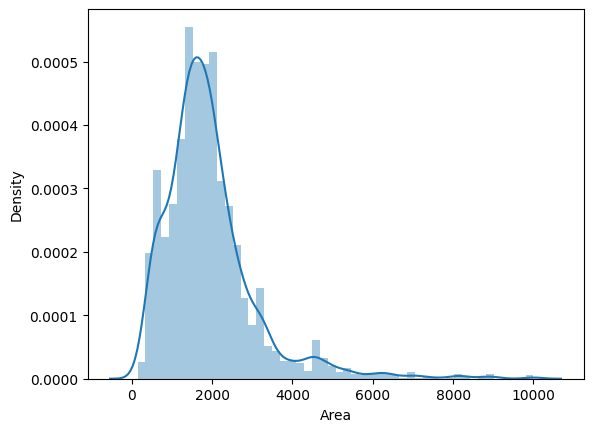

In [47]:
sns.distplot(df['Area'])

<Axes: xlabel='Area'>

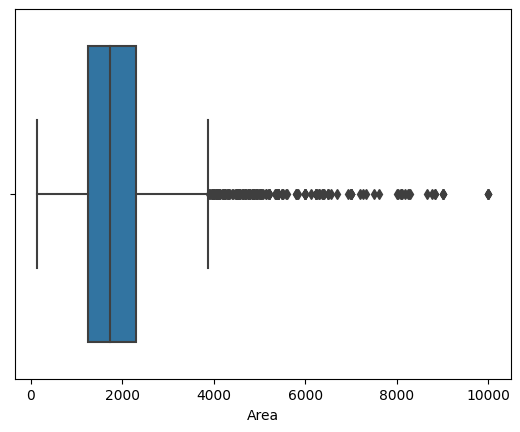

In [48]:
sns.boxplot(x=df['Area'])

In [49]:
df['Area'].describe()

count     3748.000000
mean      1932.226521
std       1182.815936
min        145.000000
25%       1250.000000
50%       1741.000000
75%       2302.750000
max      10000.000000
Name: Area, dtype: float64

### Bedroom

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

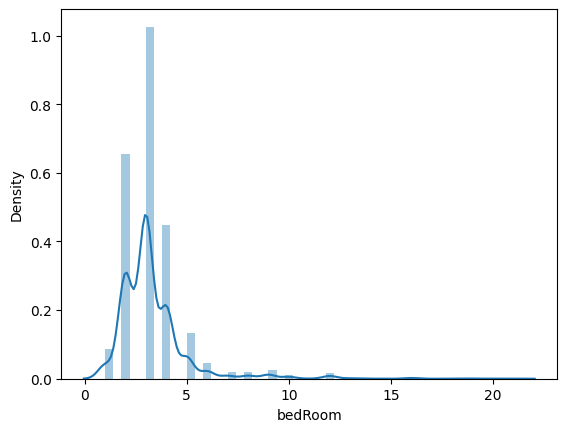

In [50]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

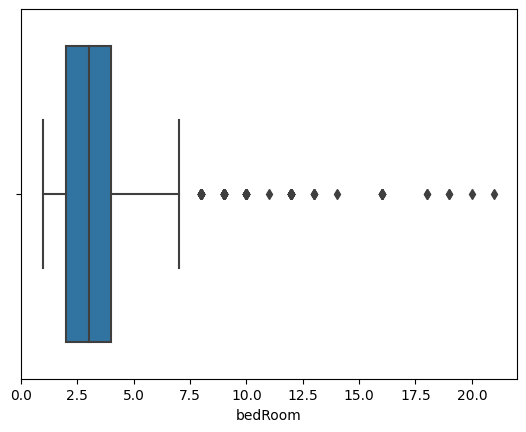

In [51]:
sns.boxplot(x=df['bedRoom'])

In [52]:
df['bedRoom'].describe()

count    3748.000000
mean        3.302828
std         1.799037
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [53]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
342,342,house,independent,sector 54,5.00,1161.0,43066.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,Relatively New,"['Sector 53-54 metro station', 'Sector 54 chow...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,129.0,NaN,0,1,0,0,0,1,"['Feng Shui / Vaastu Compliant', 'Private Gard...",49
1481,1481,house,independent,sector 43,4.50,1152.0,39062.0,Plot area 128(107.02 sq.m.),20,20,3+,servant room,4.0,East,Relatively New,"['Huda city centre metro station', 'New Life C...","['1 Water Purifier', '1 Fridge', '20 Fan', '1 ...","['Water Storage', 'Park', 'Visitor Parking', '...",NaN,128.0,NaN,0,1,0,0,0,1,"['Water Storage', 'Park', 'Visitor Parking', '...",22
2887,2887,house,independent,sector 17a,3.93,1623.0,24214.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,"study room,servant room,store room,pooja room",4.0,North-West,Relatively New,"['Iffco chowk metro station', 'Citi bank ATM',...",NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1622.0,NaN,1,1,1,1,0,0,"['Feng Shui / Vaastu Compliant', 'Private Gard...",74
987,987,house,independent,sector 17a,3.87,7500.0,5160.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,"study room,store room",5.0,North-West,Relatively New,"['Iffco chowk metro station', 'Citi bank ATM',...",NaN,"['False Ceiling Lighting', 'Water Storage', 'N...",NaN,7500.0,NaN,1,0,1,0,0,0,"['False Ceiling Lighting', 'Water Storage', 'N...",68
2797,2797,house,independent,sector 54,5.50,1440.0,38194.0,Plot area 160(133.78 sq.m.),18,18,3+,servant room,4.0,South-West,Relatively New,"['Sector 54 chowk metro station', 'Sector metr...","['1 Water Purifier', '22 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN,160.0,NaN,0,1,0,0,0,1,"['Feng Shui / Vaastu Compliant', 'High Ceiling...",70
287,287,house,private house,sector 55,7.05,1503.0,46906.0,Plot area 167(139.63 sq.m.),18,18,3+,others,4.0,North-East,Relatively New,"['Iffco chowk metro station', 'Mg road metro s...","['18 Fan', '1 Fridge', '1 Exhaust Fan', '21 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,167.0,NaN,0,0,0,0,1,1,"['Feng Shui / Vaastu Compliant', 'Security / F...",57
97,97,house,luxury dlf city floors,sector 26,20.00,4091.0,48888.0,Plot area 500(418.06 sq.m.),16,16,3+,servant room,4.0,NaN,New Property,"['Sikandarpur metro station', 'Sikanderpur met...","['16 Wardrobe', '26 Fan', '1 Exhaust Fan', '16...","['High Ceiling Height', 'Park', 'Visitor Parki...",NaN,500.0,NaN,0,1,0,0,0,2,"['High Ceiling Height', 'Park', 'Visitor Parki...",31
986,986,house,independent,sector 56,12.39,2700.0,45889.0,Plot area 300(250.84 sq.m.),16,18,3+,"pooja room,servant room",4.0,North-East,New Property,"['Sector metro station', 'Sector metro station...","['4 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stov...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,300.0,NaN,0,1,0,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",49
1870,1870,house,independent,sector 11,4.50,1800.0,25000.0,Plot area 200(167.23 sq.m.),16,16,3+,not available,4.0,South,Relatively New,"['Hanuman Mandir', 'Rajiv Chowk Mosque', 'Rama...","['24 Wardrobe', '20 Fan', '1 Exhaust Fan', '14...","['Feng Shui / Vaastu Compliant', 'Park', 'Visi...",NaN,200.0,NaN,0,0,0,0,0,2,"['Feng Shui / Vaastu Compliant', 'Park', 'Visi...",20
2623,2623,house,independent,sector 40,12.00,3078.0,38986.0,Plot area 342(285.96 sq.m.),16,16,3+,"pooja room,study room,servant room,store room",4.0,NaN,New Property,"['Huda city centre metro station', 'Axis bank ...","['20 Wardrobe', '24 Fan', '18 Geyser', '99 Lig...",NaN,NaN,342.0,NaN,1,1,1,1,0,2,[],0


In [54]:
df = df[df['bedRoom'] <= 10]

In [55]:
df.shape

(3703, 29)

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

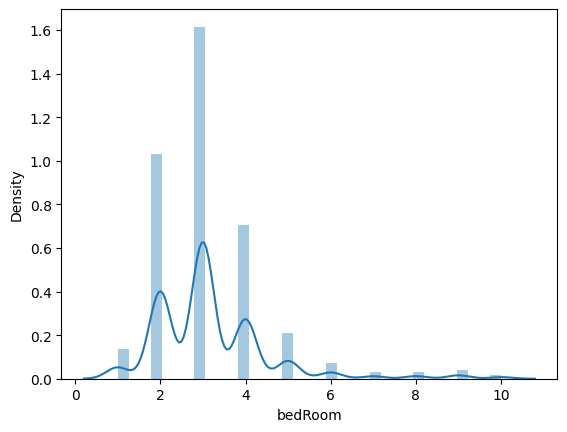

In [56]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

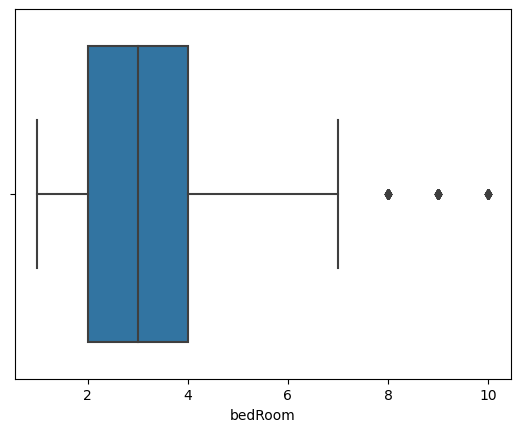

In [57]:
sns.boxplot(x=df['bedRoom'])

In [58]:
df['bedRoom'].describe()

count    3703.000000
mean        3.176614
std         1.365874
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathroom', ylabel='Density'>

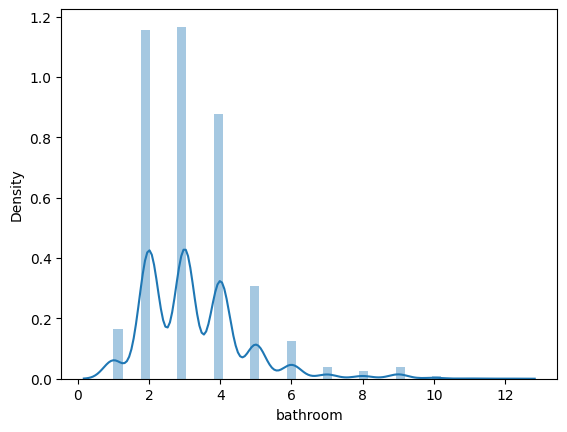

In [59]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

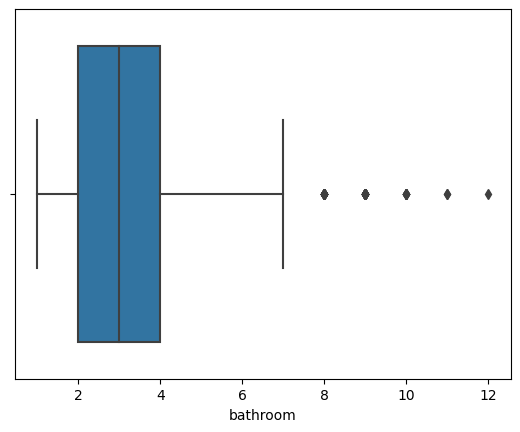

In [60]:
sns.boxplot(x=df['bathroom'])

In [61]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
1591,1591,house,adani brahma samsara,sector 60,18.02,6390.0,28200.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,servant room,3.0,North-East,Relatively New,"['Sector 55-56 Rapid Metro', 'Paras Trinity Ma...","['1 Exhaust Fan', '12 Geyser', '12 AC', '1 Mod...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,6390.0,NaN,0,1,0,0,0,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",146
209,209,house,independent,sector 24,11.00,3806.0,28902.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,"pooja room,study room,servant room,others",3.0,East,Old Property,NaN,"['8 Wardrobe', '12 Fan', '1 Exhaust Fan', '8 G...","['Private Garden / Terrace', 'Swimming Pool', ...",NaN,5000.0,NaN,1,1,0,1,1,2,"['Private Garden / Terrace', 'Swimming Pool', ...",39
294,294,house,independent,sector 39,7.00,7000.0,10000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,pooja room,4.0,South-East,Relatively New,"['Rajiv Chowk Mosque', 'State bank of india AT...","['1 Water Purifier', '38 Fan', '1 Exhaust Fan'...","['Security / Fire Alarm', 'Water purifier', 'H...",NaN,7000.0,NaN,0,0,0,1,0,1,"['Security / Fire Alarm', 'Water purifier', 'H...",38


In [62]:
df.head()

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,South,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - So...","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'N...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",1789.0,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,not available,12.0,East,Undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro St...",NaN,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",NaN,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3.0,Na,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Prat...","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1...","['Lift(s)', 'Water purifier', 'Maintenance Sta...",NaN,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,Na,New Property,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,"store room,pooja room",4.0,East,Relatively New,"['Radhakrishna Shani Mandir', 'Sanatan Dharm M...","['8 Wardrobe', '4 Fan', '1 Exhaust Fan', '12 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


### super built up area

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

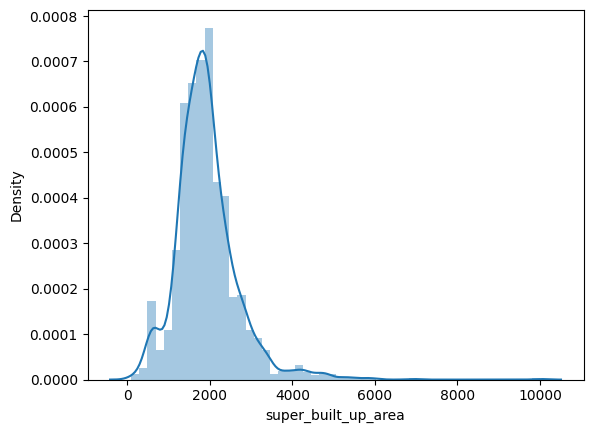

In [63]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

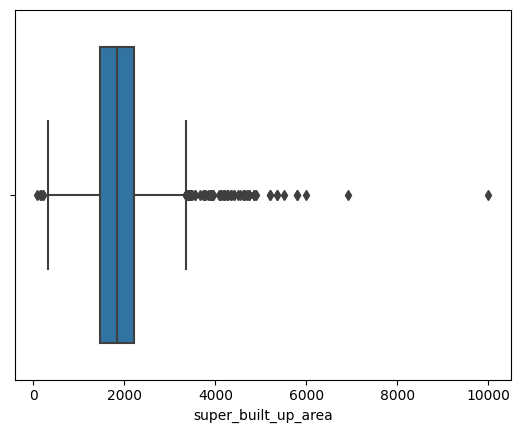

In [64]:
sns.boxplot(x=df['super_built_up_area'])

In [65]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [66]:
df[df['super_built_up_area'] > 6000]

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
1834,1834,flat,krrish provence estate,gwal pahari,7.5,10000.0,7500.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,"pooja room,servant room,others",23.0,North-East,Relatively New,"['Tniy Toons School', 'Pathways School Gurgoan...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",10000.0,NaN,NaN,0,1,0,1,1,0,"['Feng Shui / Vaastu Compliant', 'Security / F...",49
1854,1854,flat,bestech park view grand spa,sector 81,4.7,6926.0,6786.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,servant room,19.0,North,Relatively New,"['Sapphire 83 Mall', 'NH-8, IMT Manesar', 'Dwa...","['4 Wardrobe', '1 Exhaust Fan', '4 Geyser', '4...","['Security / Fire Alarm', 'Power Back-up', 'Pr...",6926.0,NaN,NaN,0,1,0,0,0,2,"['Security / Fire Alarm', 'Power Back-up', 'Pr...",140


### built up area

C:\Users\sharm\AppData\Local\Temp\ipykernel_11220\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Density'>

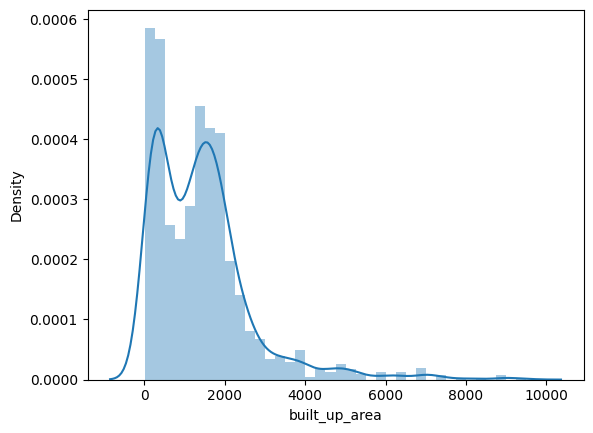

In [67]:
sns.distplot(df['built_up_area'])

In [2]:
df = pd.read_csv('worktill11132024.csv')

In [3]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,...,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,1,1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,...,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61


<Axes: xlabel='built_up_area'>

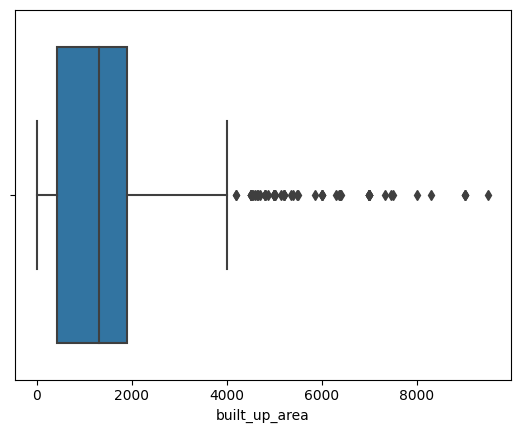

In [4]:
sns.boxplot(x=df['built_up_area'])

In [5]:
df[df['built_up_area'] > 10000]

,Unnamed: 0.1,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score


### carpet area

C:\Users\sharm\AppData\Local\Temp\ipykernel_15860\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Density'>

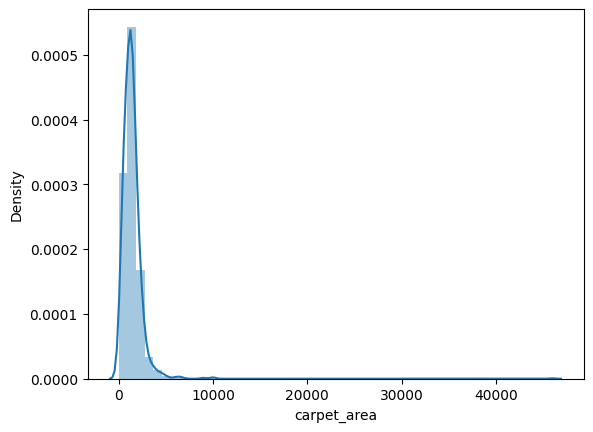

In [6]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

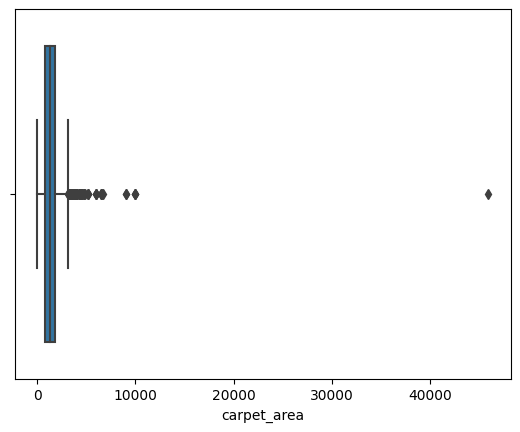

In [7]:
sns.boxplot(x= df['carpet_area'])

In [8]:
df[df['carpet_area'] > 10000]

,Unnamed: 0.1,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
1508,1543,1543,flat,ramsons kshitij,sector 95,0.24,477.0,53.0,Carpet area: 45966 (4270.38 sq.m.),2,...,NaN,45966.0,0,0,0,0,1,0,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",33


In [9]:
df.loc[1508,'carpet_area']= 477

In [10]:
df[df['carpet_area'] > 10000]

,Unnamed: 0.1,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score


In [11]:
df.head()

,Unnamed: 0.1,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,...,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,1,1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,...,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,2,2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,...,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,3,3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6722.0,Carpet area: 595 (55.28 sq.m.),2,...,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,4,4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,...,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


In [12]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis= 1)

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,...,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,...,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,...,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,...,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,...,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,house,ansals florence villa,sector 57,6.00,2700.0,22222.0,Plot area 300(250.84 sq.m.),4,5,2,...,300.0,NaN,0,1,0,1,0,2,"['Feng Shui / Vaastu Compliant', 'Park', 'Rain...",20
3699,flat,dlf the primus,sector 82a,2.70,2576.0,10481.0,Super Built up area 2576(239.32 sq.m.)Carpet a...,4,4,3+,...,NaN,1306.0,0,1,0,0,0,0,"['Intercom Facility', 'Lift(s)', 'Swimming Poo...",38
3700,house,independent,sector 13,9.00,8100.0,11111.0,Plot area 900(83.61 sq.m.),10,5,3+,...,900.0,NaN,0,0,0,0,0,0,[],0
3701,house,independent,sector 25,13.50,3618.0,37313.0,Plot area 402(336.12 sq.m.),5,6,3+,...,402.0,NaN,0,0,0,0,1,2,"['Security / Fire Alarm', 'Water purifier', 'S...",79


C:\Users\sharm\AppData\Local\Temp\ipykernel_15860\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Density'>

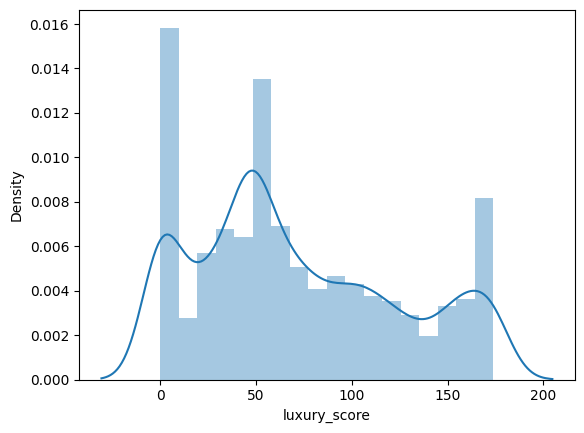

In [13]:
sns.distplot(df['luxury_score'])

<Axes: >

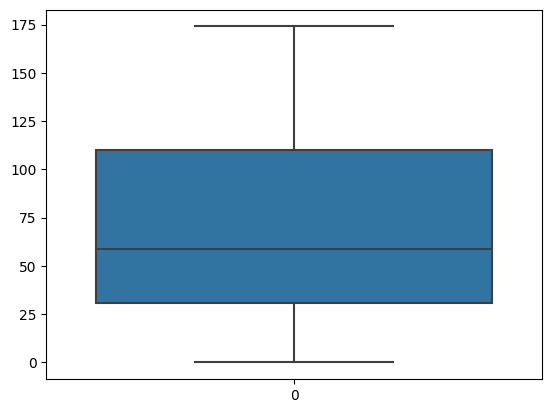

In [14]:
sns.boxplot(df['luxury_score'])

In [15]:
df['price_per_sqft'] = round((df['price']*10000000)/df['Area'])

In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,...,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,1,1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,...,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,2,2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,...,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,3,3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6723.0,Carpet area: 595 (55.28 sq.m.),2,...,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,4,4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,...,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


In [17]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis= 1, inplace=True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_15860\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Python 311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

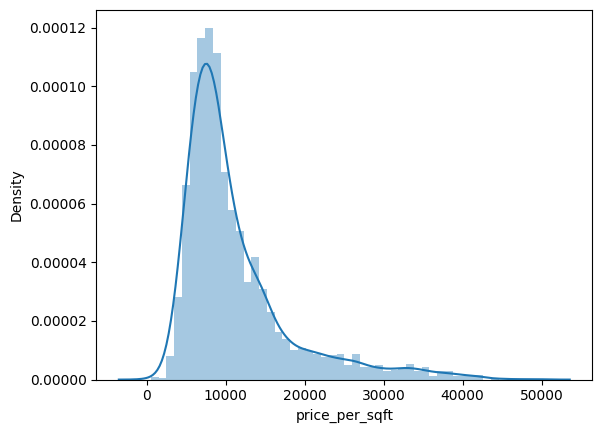

In [18]:
sns.distplot(df['price_per_sqft'])

<Axes: >

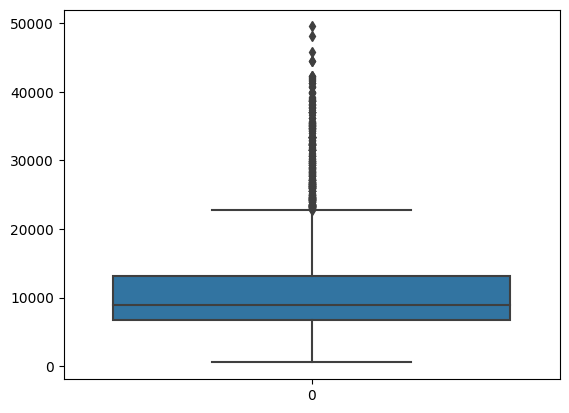

In [19]:
sns.boxplot(df['price_per_sqft'])

In [20]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
309,house,independent,sector 55,5.0,1125.0,44444.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,...,115.0,100.0,0,0,0,0,1,2,"['Private Garden / Terrace', 'Maintenance Staf...",44
686,house,independent,sector 26,20.0,4500.0,44444.0,Plot area 500(418.06 sq.m.),5,7,3+,...,500.0,NaN,0,1,0,1,0,1,"['Security / Fire Alarm', 'Private Garden / Te...",97
698,house,independent,sector 25,13.0,2844.0,45710.0,Plot area 316(264.22 sq.m.),6,8,3+,...,316.0,NaN,1,1,1,1,0,1,[],0
1712,house,dlf city plots,sector 26,19.0,4518.0,42054.0,Plot area 502(419.74 sq.m.),6,6,3,...,502.0,NaN,1,1,0,0,0,2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",121
2039,house,independent,sector 43,9.5,2250.0,42222.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,...,300.0,250.0,0,1,0,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",88
2199,house,independent,sector 28,12.0,2844.0,42194.0,Plot area 316(264.22 sq.m.),4,5,3+,...,316.0,NaN,0,1,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",60
2645,house,independent,sector 105,9.9,2000.0,49500.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,...,2000.0,1800.0,0,0,0,0,0,0,[],0
2743,house,sushant lok 1 builder floors,sector 43,13.0,2700.0,48148.0,Plot area 300(250.84 sq.m.),3,3,3+,...,300.0,NaN,0,0,0,1,0,2,['Visitor Parking'],7
3684,house,independent,sector 26,19.0,4500.0,42222.0,Plot area 500(418.06 sq.m.),6,8,3+,...,500.0,NaN,1,1,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",103


In [22]:
x = df[df['price_per_sqft'] <= 20000]
(x['Area']/x['bedRoom']).quantile(0.02)

193.67999999999998

In [24]:
df[(df['Area']/df['bedRoom'])<194]

,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,...,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94
68,house,independent,sector 21,0.60,972.0,6173.0,Plot area 108(90.3 sq.m.),8,3,2,...,108.0,NaN,0,0,0,0,0,0,[],0
122,house,independent,sector 12,6.00,1710.0,35088.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,...,NaN,1600.0,0,0,0,0,0,0,[],0
191,house,ansal,sector 43,1.85,540.0,34259.0,Plot area 60(5.57 sq.m.),8,8,3+,...,60.0,NaN,0,0,0,0,0,0,"['Private Garden / Terrace', 'Water purifier',...",53
277,house,independent,sector 17,0.32,145.0,22069.0,Built Up area: 145 (13.47 sq.m.),2,2,0,...,145.0,NaN,0,0,0,0,0,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,house,independent,sector 105,1.10,900.0,12222.0,Carpet area: 900 (83.61 sq.m.),6,4,1,...,NaN,900.0,0,0,0,0,0,0,[],0
3562,house,independent,sector 9,1.25,1431.0,8735.0,Plot area 159(132.94 sq.m.),10,6,3+,...,159.0,NaN,0,0,0,0,0,0,[],0
3573,house,independent,sector 105,0.55,504.0,10913.0,Built Up area: 56 (5.2 sq.m.),4,4,0,...,56.0,NaN,0,0,0,0,0,0,[],0
3587,house,independent,sector 9,0.22,297.0,7407.0,Carpet area: 33 (27.59 sq.m.),2,2,2,...,NaN,33.0,0,0,0,0,0,0,[],0


In [32]:
df = pd.read_csv('worktill11142024.csv')

In [33]:
df.head()

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,flat,central park flower valley,sector 33,1.79,1591.0,11251.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,South,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - So...","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'N...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",1789.0,NaN,NaN,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,1,house,satya the hermitage,sector 103,3.15,4700.0,6702.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,not available,12.0,East,Undefined,"['Metro Hospital, Palam Vihar', 'Huda Metro St...",NaN,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",NaN,4700.0,NaN,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,2,flat,not applicable,sector 4,0.42,750.0,5600.0,Carpet area: 750 (69.68 sq.m.),2,2,1,not available,3.0,Na,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Prat...","['4 Wardrobe', '1 Water Purifier', '2 Fan', '1...","['Lift(s)', 'Water purifier', 'Maintenance Sta...",NaN,NaN,750.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,3,flat,tulsiani easy in homes,sohna road,0.40,595.0,6723.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,Na,New Property,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,NaN,595.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,"store room,pooja room",4.0,East,Relatively New,"['Radhakrishna Shani Mandir', 'Sanatan Dharm M...","['8 Wardrobe', '4 Fan', '1 Exhaust Fan', '12 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


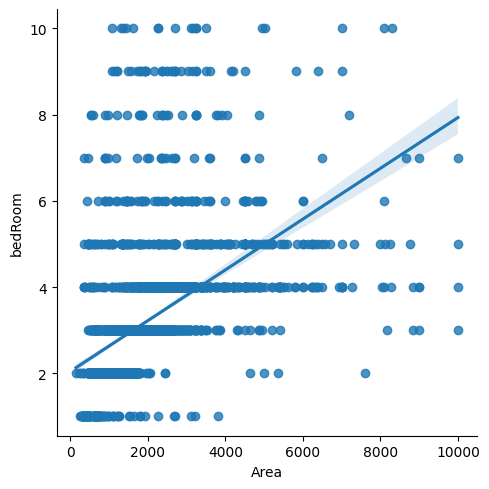

In [34]:
sns.lmplot(data= df, x = 'Area', y = 'bedRoom')

In [35]:
df.shape

(3703, 29)

In [36]:
df['area_room_ratio'] = df['Area']/df['bedRoom']

In [37]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

bedRoom
2     49
3     35
5     28
6     17
4     17
9     15
8     12
7      8
10     7
Name: count, dtype: int64

In [38]:
df.shape

(3703, 30)

In [39]:
df = df[df['area_room_ratio']>100]

In [40]:
df.shape

(3683, 30)

In [41]:
outlier_df = df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [42]:
df.update(outlier_df)

In [43]:
df.shape

(3683, 30)

In [44]:
df['area_room_ratio']= df['Area']/df['bedRoom']

In [45]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

,Unnamed: 0,property_type,society,sector,price,Area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score,area_room_ratio
4,4,house,sector 57 huda,sector 57,3.80,1458.0,26063.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,"store room,pooja room",4.0,East,Relatively New,"['Radhakrishna Shani Mandir', 'Sanatan Dharm M...","['8 Wardrobe', '4 Fan', '1 Exhaust Fan', '12 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,162.0,160.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94,182.250000
21,21,house,independent,sector 25,7.60,1961.0,38756.0,Plot area 215(179.77 sq.m.),9,9,3,"study room,pooja room,store room",4.0,East,Relatively New,"['Vodafone belvedere towers metro station', 'D...","['1 Water Purifier', '9 Fan', '1 Exhaust Fan',...","['Security / Fire Alarm', 'Water purifier', 'H...",NaN,215.0,NaN,1,0,1,1,0,2,"['Security / Fire Alarm', 'Water purifier', 'H...",84,217.888889
49,49,house,independent,sector 3 phase 2,1.10,1100.0,10000.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,not available,1.0,East,Undefined,NaN,NaN,NaN,NaN,1100.0,900.0,0,0,0,0,0,0,[],0,220.000000
53,53,house,independent,sector 24,3.50,1080.0,32407.0,Plot area 120(100.34 sq.m.),5,4,3,not available,3.0,North-West,Old Property,"['Dlf phase 3 metro station', 'Micromax moulsa...",NaN,"['Water Storage', 'Park']",NaN,120.0,NaN,0,0,0,0,0,0,"['Water Storage', 'Park']",15,216.000000
68,68,house,independent,sector 21,0.60,972.0,6173.0,Plot area 108(90.3 sq.m.),8,3,2,not available,3.0,NaN,Old Property,"['Chintapurni Mandir', 'State bank ATM', 'Shre...","['4 Wardrobe', '5 Fan', '4 Light', 'No AC', 'N...",NaN,NaN,108.0,NaN,0,0,0,0,0,0,[],0,121.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,3476,house,sai kripa floors 5,sector 11,0.90,800.0,11250.0,Plot area 800(74.32 sq.m.),5,5,3,not available,3.0,NaN,Relatively New,"['Rajiv Chowk Mosque', 'Hanuman Mandir', 'Stat...",[],NaN,NaN,800.0,NaN,0,0,0,0,0,0,[],0,160.000000
3516,3516,house,independent,sector 105,1.10,900.0,12222.0,Carpet area: 900 (83.61 sq.m.),6,4,1,not available,1.0,South-West,Undefined,NaN,NaN,NaN,NaN,NaN,900.0,0,0,0,0,0,0,[],0,150.000000
3562,3562,house,independent,sector 9,1.25,1431.0,8735.0,Plot area 159(132.94 sq.m.),10,6,3+,not available,3.0,NaN,Old Property,"['State bank ATM', 'Ankur Clinic and Maternity...",[],NaN,NaN,159.0,NaN,0,0,0,0,0,0,[],0,143.100000
3590,3590,house,independent,sector 47,4.30,1467.0,29312.0,Plot area 163(136.29 sq.m.),6,4,2,others,2.0,NaN,Moderately old,"['Standard chartered ATM', 'Icici bank ATM', '...",[],NaN,NaN,163.0,NaN,0,0,0,0,1,0,[],0,244.500000


In [46]:
df.shape

(3683, 30)

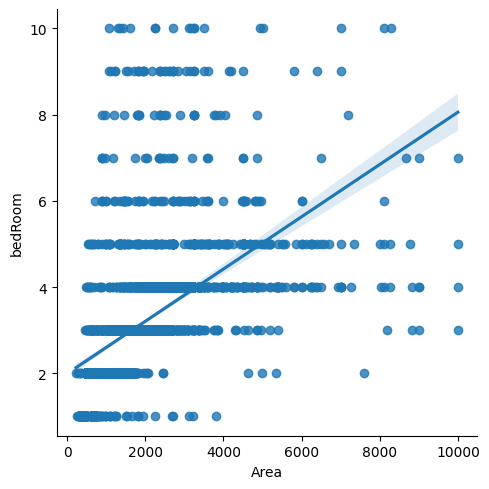

In [47]:
sns.lmplot(data= df, x = 'Area', y = 'bedRoom')

In [48]:
df.shape

(3683, 30)

In [ ]:
df.to_csv('gurgon_property_outlier_treated.csv', index= False)